# Weekly activity
1. Apply k-means clustering on 'zebra.jfif' to segment out the zebra.
   - You are required to determine the optimal k by plotting the within cluster sum of squares vs number of clusters (2-10).
   - Apply the clustering method on 3 color spaces: BGR, HSV and LAB. Compare the results obtained.

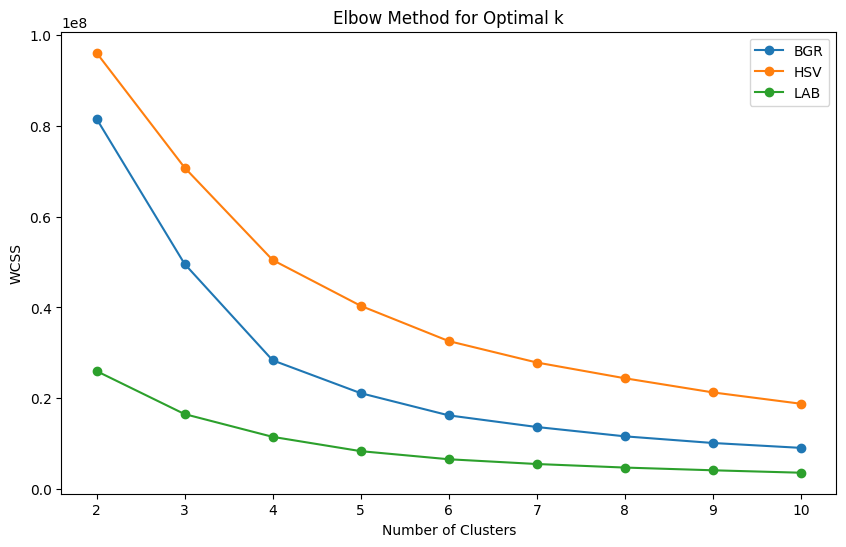

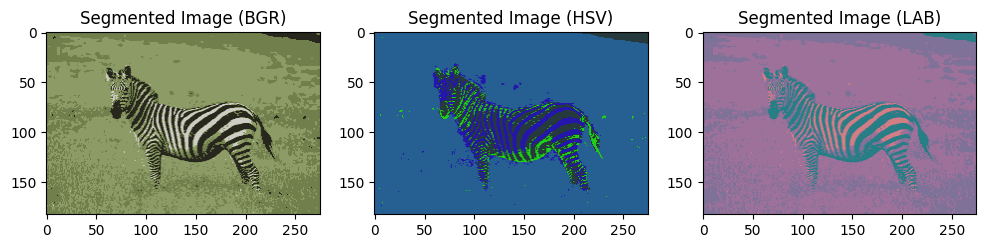

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.cluster")

# Load the image
image = cv2.imread('images/zebra.jfif')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Preprocess the image
reshaped_image = image_rgb.reshape(-1, 3)

# Calculate WCSS for different values of k
wcss_values_bgr = []
wcss_values_hsv = []
wcss_values_lab = []
k_values = range(2, 11)

for k in k_values:
    kmeans_bgr = KMeans(n_clusters=k, random_state=0)
    kmeans_bgr.fit(reshaped_image)
    wcss_values_bgr.append(kmeans_bgr.inertia_)
    
    hsv_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
    reshaped_hsv_image = hsv_image.reshape(-1, 3)
    kmeans_hsv = KMeans(n_clusters=k, random_state=0)
    kmeans_hsv.fit(reshaped_hsv_image)
    wcss_values_hsv.append(kmeans_hsv.inertia_)
    
    lab_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2LAB)
    reshaped_lab_image = lab_image.reshape(-1, 3)
    kmeans_lab = KMeans(n_clusters=k, random_state=0)
    kmeans_lab.fit(reshaped_lab_image)
    wcss_values_lab.append(kmeans_lab.inertia_)

# Plot WCSS vs. Number of Clusters
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss_values_bgr, marker='o', label='BGR')
plt.plot(k_values, wcss_values_hsv, marker='o', label='HSV')
plt.plot(k_values, wcss_values_lab, marker='o', label='LAB')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.show()

# Choose the optimal k values for each color space based on the plot
optimal_k_bgr = 4  # Example value, choose based on the plot
optimal_k_hsv = 4  # Example value, choose based on the plot
optimal_k_lab = 4  # Example value, choose based on the plot

# Apply K-Means Clustering for each color space
kmeans_bgr = KMeans(n_clusters=optimal_k_bgr, n_init=10, random_state=0)
kmeans_bgr.fit(reshaped_image)

kmeans_hsv = KMeans(n_clusters=optimal_k_hsv, n_init=10, random_state=0)
kmeans_hsv.fit(reshaped_hsv_image)

kmeans_lab = KMeans(n_clusters=optimal_k_lab, n_init=10, random_state=0)
kmeans_lab.fit(reshaped_lab_image)

# Assign cluster labels to pixels and create segmented images
labels_bgr = kmeans_bgr.predict(reshaped_image)
labels_hsv = kmeans_hsv.predict(reshaped_hsv_image)
labels_lab = kmeans_lab.predict(reshaped_lab_image)

segmented_image_bgr = kmeans_bgr.cluster_centers_[labels_bgr].reshape(image_rgb.shape)
segmented_image_hsv = kmeans_hsv.cluster_centers_[labels_hsv].reshape(image_rgb.shape)
segmented_image_lab = kmeans_lab.cluster_centers_[labels_lab].reshape(image_rgb.shape)

# Display the segmented images
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(segmented_image_bgr.astype(np.uint8))
plt.title('Segmented Image (BGR)')
plt.subplot(132)
plt.imshow(segmented_image_hsv.astype(np.uint8))
plt.title('Segmented Image (HSV)')
plt.subplot(133)
plt.imshow(segmented_image_lab.astype(np.uint8))
plt.title('Segmented Image (LAB)')
plt.show()
